# RT-1
当一个模型训练完之后里面的参数就不变了，不训练就没有进步，只有原来的数据集供它训练，反复训练同样的技能，泛化能力也就不怎么样。要给它一些自由探索的机会，要允许机器人“探索"自己的身体和周围的环境

在抓取任务当中，物体的颜色是无关信息，而轮廓特征是有效信息，因此轮廓比颜色需要更多的注意力，这一点RT-1已经做到了

关于用其他数据进行训练，在生活中我们有“看者容易做者难”的说法，不妨可以参考这个过程进行训练来提高模型的泛化能力。给模型一段视频，可以是同一过程的多个角度，就像现场教学一样，但只有这一段素材作为训练数据，达到一定程度后，在相似的环境和条件下进行无监督学习，一开始它能定做得不好，只是”拙劣的模仿“，视屏素材训练到一定程度之后，模型应该可以自己“摸索”出来。（但我不了解无监督学习，这个想法有待考证）。实在不行，“点拨”一下（这个真是说得容易做着难），允许新的语义信息在训练过程中嵌入可能是一个可行的方法。

## How does the Action tokenization work?
I just give an exmaple. If the range of the arm movement 'x' is -1 to 1,then,we discretized it into 256 bins,the width of each bin is:
$$
bin_w = \frac{2}{256} = 0.0078125
$$
then,the continusely movements is mapped to 256 bins:

$bin0: [-1.0000 , -0.9922)$

$bin1: [-0.9922 , -0.9844)$

$...$

$bin255: [0.9922 , 1.0000]$

Finally,we can map the movements into bin_index:
$$
index = floor((x - min) / (max - min) * 256)
$$
Now you know that the output of the transformer is a 11 dimension vectory like:
$[x_{bin}, y_{bin}, z_{bin}, roll_{bin}, ..., mode_{bin}]$
when the robot act the movement,we decode it into continues value by:
$real_value = min + (bin_index + 0.5) * bin_width$


## Why we discretized the action into bins?
**Convert action prediction into a classification problem.**
 Every bin is like a word,transformers excel at this kind of token sequence prediction.

## EXPERRIENTS
RT-1 is inferring and acting at the same time,which means it need fast inferring speed limiting the size of model also leading to a relatively low accuracy. Why we just use model to plan the stratage,control the robot with traditional control-method？

## Can an RT-1 learn to perform a large number of instructions, as well as to generalize inzero shot to new tasks, objects and environments?
Yes

# CAN WE PUSH THE RESULTING MODEL FURTHER BY INCORPORATING HETEROGENEOUS DATA SOURCES SUCH AS SIMULATION OR DATA FROM DIFFERENT ROBOTS ?
If EDR have been trained by the dataset collected from itself,more data from different robots with different task could improve the performance on certainly task. But if EDR use the model just be trained by the datasets collected from different robot,it could do any thing at all. I think that,the model need to know about itself.For example, a joint rotate to a aim degree will lead to completely different position and pose.

But the RT-1 output is not joints degrees but end position and pose.  Another possible reason is that the model just lead the amr to make the object lay in absolute position,but ignore the location relative to gripper.

# HOW DO VARIOUS METHODS GENERALIZE LONG - HORIZON ROBOTIC SCENARIOS ?
Combine with SayCan, the ability of long-horizon robotic scenarios improves a lot.

# HOW DO GENERALIZATION METRICS CHANGE WITH VARYING AMOUNTS OF DATA QUANTITY AND DATA DIVERSITY ?
Data diversity has a higher impact on the performance and
generalization than data quantity.
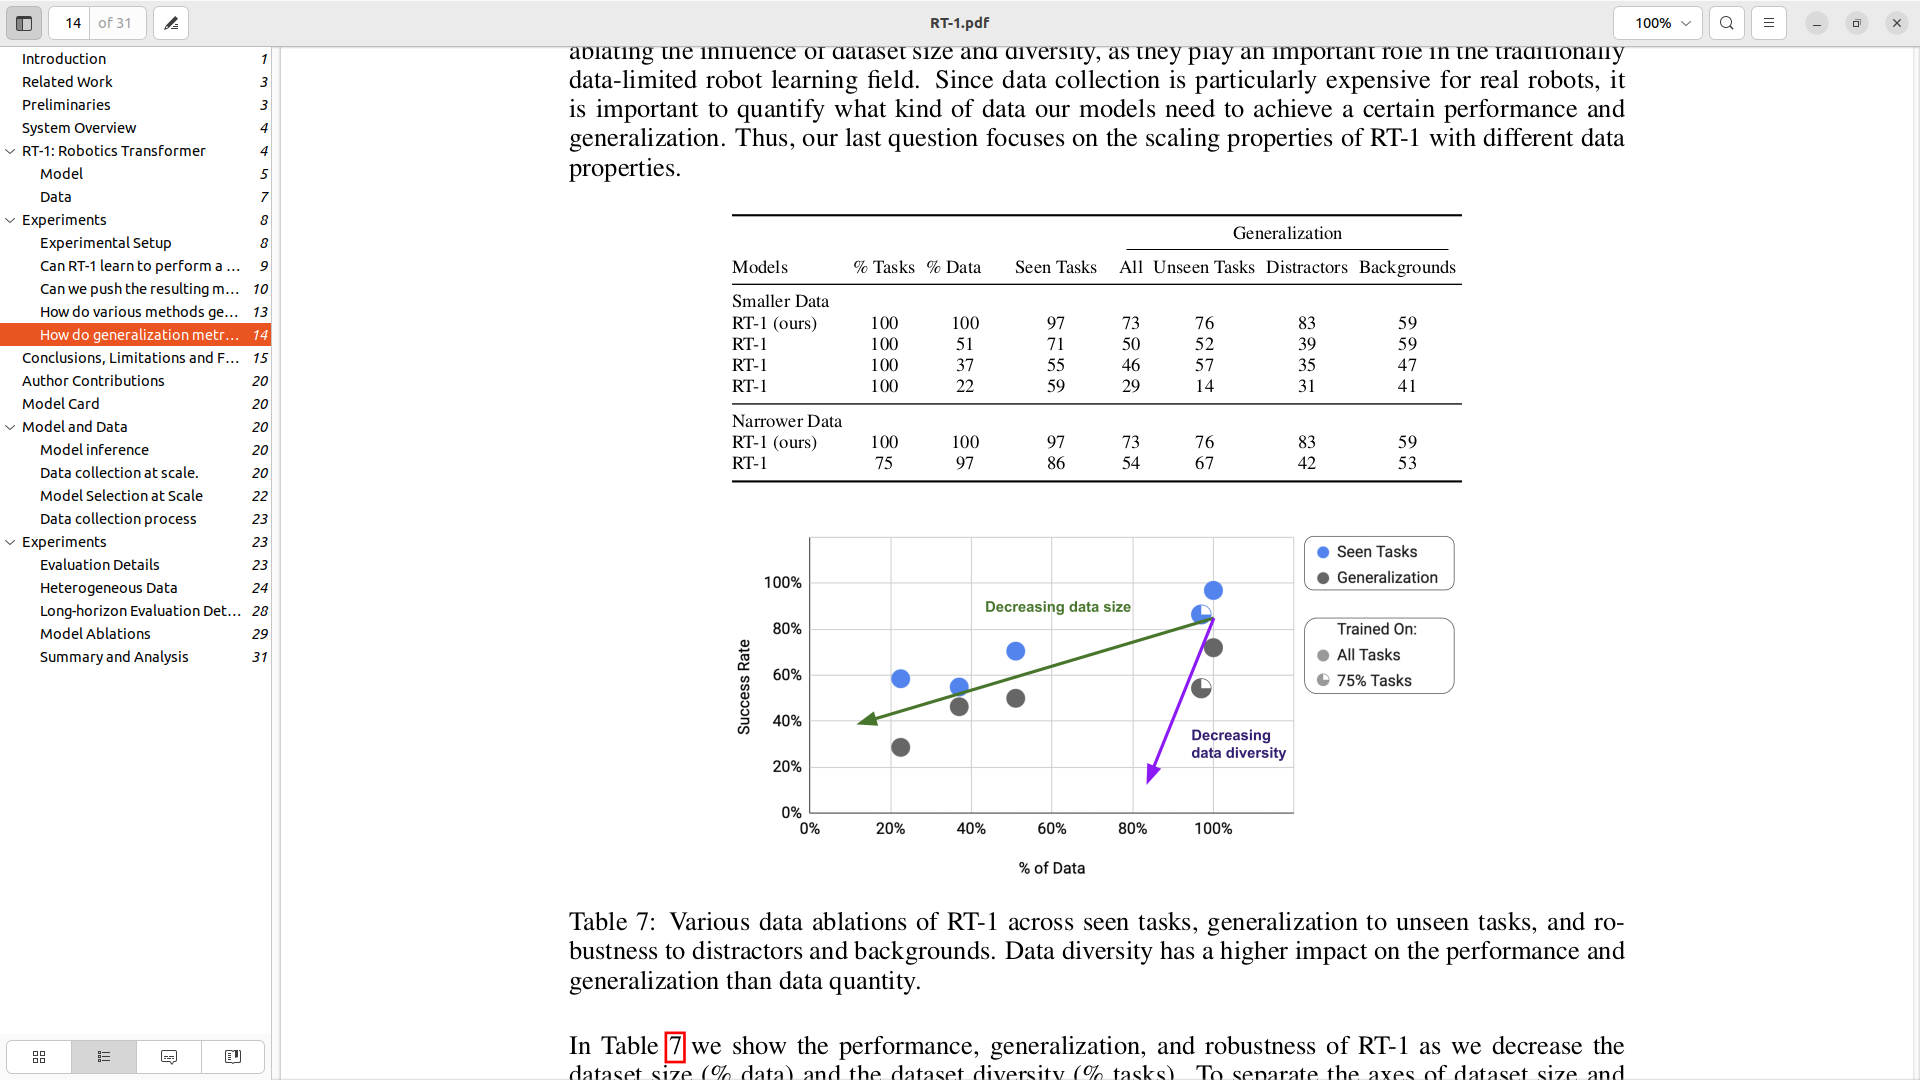